/Users/qianyu/opt/anaconda3/lib/python3.8/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


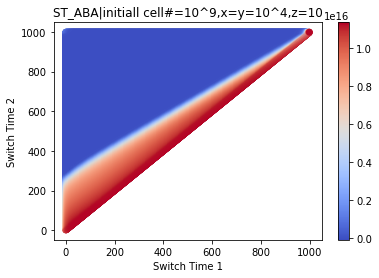

In [11]:
## drug switch time, ABA
#!/usr/bin/python

import numpy as np 
import matplotlib as mpl
from scipy.integrate import odeint 
import matplotlib.pyplot as plt 

def dyna(x, t, *arg):
    (qxw, pxw, qzw, pzw, qzx, pzx, qzy, pzy, a, b, c, f, g, h, k, p, q ) = arg
    dw = ((qxw*(x[1]/(x[0]+α)))/(pxw+(x[1]/(x[0]+α))) + ((qzw*(x[3]/(x[0]+α)))/(pzw+(x[3]/(x[0]+α))))+a)*x[0] 
    dx = g*x[0] + (((qzx*(x[3]/(x[1]+α)))/(pzx+(x[3]/(x[1]+α))))+b)*x[1]
    dy = h*x[0] + (((qzy*(x[3]/(x[2]+α)))/(pzy+(x[3]/(x[2]+α))))+c)*x[2]
    dz = k*x[0] + p*x[1] + q*x[2] + f*x[3]
    return np.array([dw, dx, dy, dz])

def dynb(x, t, *arg):
    (qyw, pyw, qzw, pzw, qzx, pzx, qzy, pzy, a, b, c, f, g, h, k, p, q ) = arg
    dw = ((qyw*(x[2]/(x[0]+α)))/(pyw+(x[2]/(x[0]+α))) + ((qzw*(x[3]/(x[0]+α)))/(pzw+(x[3]/(x[0]+α))))+a)*x[0] 
    dx = g*x[0] + (((qzx*(x[3]/(x[1]+α)))/(pzx+(x[3]/(x[1]+α))))+b)*x[1]
    dy = h*x[0] + (((qzy*(x[3]/(x[2]+α)))/(pzy+(x[3]/(x[2]+α))))+c)*x[2]
    dz = k*x[0] + p*x[1] + q*x[2] + f*x[3]
    return np.array([dw, dx, dy, dz])

def title_and_labels(ax, title):
    ax.set_title(title)
    ax.set_xlabel("$x$", fontsize=10)
    ax.set_ylabel("$y$", fontsize=10)
    ax.set_zlabel("$z$", fontsize=10)

α = 0.00000001

initial_N = 10**9
X = 10**4
Y = 10**4
Z = 10
W = initial_N-X-Y-Z
α = 0.00000001

tim1 = list()
tim2 = list()
total = list()
output = list()
t_end = 1000

qxw = 0.08
pxw = 0.0009
pyw = 0.08
qyw = 0.0009
qzw = 0.06
pzw = 0.0009
qzx = 0.07
pzx = 0.0009
qzy = 0.007
pzy = 0.0009

aA = -0.17
bA = 0.008
cA = -0.137

aB = -0.321
bB = -0.187
cB = 0.0203

f = 0.022
g = 0.0000001 
h = 0.0000001 
k = 0.0000001 
p = 0.0000001 
q = 0.0000001

paramsA = (qxw, pxw, qzw, pzw, qzx, pzx, qzy, pzy, aA, bA, cA, f, g, h, k, p, q )
paramsB = (qyw, pyw, qzw, pzw, qzx, pzx, qzy, pzy, aB, bB, cB, f, g, h, k, p, q )

for t1 in np.arange(1, t_end-2, 1):
    for t2 in np.arange(t1+1, t_end-1, 1):
        cell_init = (W, X, Y, Z)
        list_t1 = np.arange(0, t1, 1) 
        list_t2 = np.arange(t1, t2, 1)
        list_t3 = np.arange(t2, t_end, 1)
        cells1 = odeint(dyna, cell_init, list_t1, args = paramsA) 
        i1 = len(list_t1)-1
        cell1_init = [cells1[i1, 0], cells1[i1, 1], cells1[i1, 2], cells1[i1, 3]]   
        cells2 = odeint(dynb, cell1_init, list_t2, args = paramsB) 
        i2 = len(list_t2)-1
        cell2_init = [cells2[i2, 0], cells2[i2, 1], cells2[i2, 2], cells2[i2, 3]]
        cells3 = odeint(dyna, cell2_init, list_t3, args = paramsA)
        celltotal1 = cells3[:, 0] + cells3[:, 1] + cells3[:, 2] + cells3[:, 3]
        tim1.append(t1)
        tim2.append(t2)
        if celltotal1[-1] < 10**18:
            total.append(celltotal1[-1])

X = np.array(tim1)
Y = np.array(tim2)
Z = np.array(total, dtype=float)

cmap_thresholds = [0, 2, np.inf]
colors = ['blue', 'white', 'red']

plt.scatter(X, Y, c=Z, cmap=plt.cm.get_cmap('coolwarm'), vmin=None, vmax=None)
plt.colorbar()  # Add a colorbar for reference
# plt.yscale('log')
# plt.xscale('log')
plt.xlabel('Switch Time 1')
plt.ylabel('Switch Time 2')
plt.title('ST_ABA|initiall cell#=10^9,x=y=10^4,z=10')

plt.show()